<a href="https://colab.research.google.com/github/npnavas/MAT_421/blob/main/MAT_421_HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 22: Ordinary Diff Eq's - IVP
## 22.1 ODE IVP Problem statement
Here an ODE is a relation between a function of one variable and it's derivatives, the IVP part comes from the fact that we'll start with some arrangment of initial conditions. That is 
$$\frac{d^n y}{dt^n} = f\left(t, y, \frac{dy}{dt},\cdots, \frac{d^{n-1}y}{dt^{n-1}}\right),$$
$$y(t_0) = y_0, y'(t_0) = y_1,\cdots,y^{(n-1)}(t_0) = y_{n-1}.$$
For instance and ODE-IVP would look like 
$$\ddot{\Theta}(t)=-\frac{g}{l}\Theta(t), \Theta(0) = 0, \dot{\Theta}(0) = 1$$

## 22.2 Reduction of Order
In most applications we find that reducing the order of the ODE can make it easier for us to solve. Let's look at the example ODE given above. We can make a new function say $\Phi(t)$ such that $\Phi(t) = \dot{\Theta}(t)$. This would imply that $\ddot{\Theta}(t) =\dot{\Phi}(t)$. This gives us the following system
$$\dot{\Phi}(t) = -\frac{g}{l}\Theta(t)$$ 
$$\dot\Theta(t) = \Phi(t)$$
$$\implies 
\begin{pmatrix}
\Phi(t)\\
\Theta(t)
\end{pmatrix}' = 
\begin{pmatrix}
0 & -\frac{g}{l}\\
1 & 0
\end{pmatrix}
\begin{pmatrix}
\Phi(t)\\
\Theta(t)
\end{pmatrix}
$$
This is a process we can do to solve higher order ODEs numerically as we'll see in a future section.

## 22.3 Explicit Euler Method
Here we can approximate the next step by taking some step $\Delta t$ and saying that the next step $y_{i+1}$ can be computed by doing the following 
$$y(t_{i+1}) = y(t_i) + \Delta t \frac{dy(t_i)}{dt}$$
Here let's look at the equation $\dot{y}(t) = -y(t), \ y(0) = 1$ to check the validity of this method. 

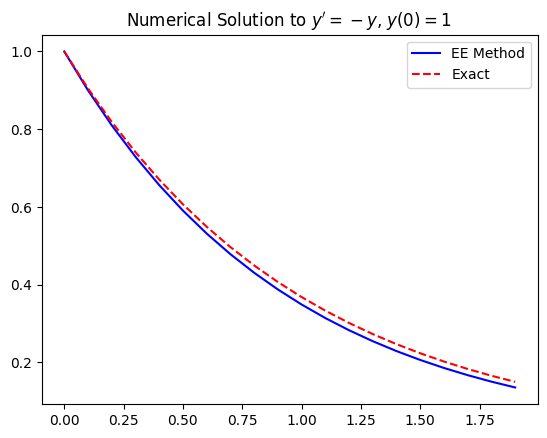

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

def f_exact(t):
  return np.exp(-t)

def solve_EE(t, y0, dt):
  tt = len(t)
  y = np.zeros(tt)
  y[0] = y0
  for i in range(tt-1):
    y[i+1] = y[i] - dt * y[i]
  return y

dt = 0.1
t = np.arange(0,2,dt)
plt.title(r"Numerical Solution to $y' = -y$, $y(0) = 1$ ")
plt.plot(t, solve_EE(t, 1, dt), "b", label = "EE Method")
plt.plot(t, f_exact(t), 'r--', label = "Exact")
plt.legend(loc = 'best')

So now let's try it with the ODE
$$\ddot\Theta(t) = -\frac{g}{l}\Theta(t),\ \Theta(0) = 0,\ \dot\Theta(0) = 1$$
Here we'll take $g = 9.8$ and $l = 1$.

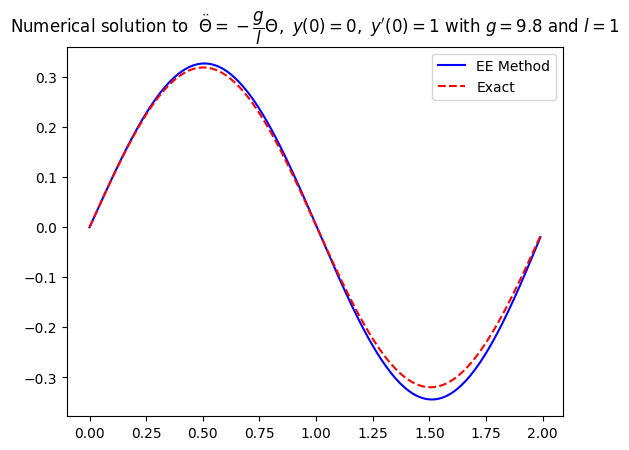

In [40]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

def f_exact(t, g, l):
  w = np.sqrt(g/l)
  return (1/w)*np.sin(w*t)

def solve_Pend_EE(t, y0, dy0, g, l, dt):
  tt = len(t)
  y = np.zeros(tt)
  dy = np.zeros(tt)
  y[0] = y0
  dy[0] = dy0
  for i in range(tt-1):
    dy[i+1] = dy[i] -dt*(g/l)*y[i]
    y[i+1] = y[i] + dt*dy[i]
  
  return y

dt = 0.01
t = np.arange(0, 2, dt)
y0 = 0
dy0 = 1
g = 9.8
l = 1
plt.title("Numerical solution to  $\ddot\Theta = -\dfrac{g}{l}\Theta,\ y(0) = 0,\ y'(0) = 1$ with $g = 9.8$ and $l = 1$")
plt.plot(t, solve_Pend_EE(t, y0, dy0, g, l, dt), "b", label = "EE Method")
plt.plot(t, f_exact(t, g, l), "r--", label = "Exact")
plt.legend(loc = "best")